In [2]:
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (
                             log_loss,
                             precision_score,
                             recall_score)
from sklearn.model_selection import LeaveOneOut
from sklearn.impute import SimpleImputer
import sys, os
import pandas as pd
import mlflow
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from read_write_util import ReadWriteUtil
from modeling_util import *

In [2]:
reader = ReadWriteUtil()
# df_train = reader.dvc_get_data('../data/train.csv', 'v3merged')
# df_train
df_train = pd.read_csv("../data/train_processed.csv")
df_train



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,WeekOfYear,weekday
0,1,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1
1,1,3,2013-01-02,5530,668,1,0,0,1,2013,1,2,1,1
2,1,4,2013-01-03,4327,578,1,0,0,1,2013,1,3,1,1
3,1,5,2013-01-04,4486,619,1,0,0,1,2013,1,4,1,1
4,1,6,2013-01-05,4997,635,1,0,0,1,2013,1,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,1,2015-07-27,10712,608,1,1,0,1,2015,7,27,31,1
1017205,1115,2,2015-07-28,8093,500,1,1,0,1,2015,7,28,31,1
1017206,1115,3,2015-07-29,7661,473,1,1,0,1,2015,7,29,31,1
1017207,1115,4,2015-07-30,8405,502,1,1,0,1,2015,7,30,31,1


In [3]:
df_train.set_index('Date', inplace=True)
df_train.shape

(1017209, 13)

In [4]:
df_train.drop(['StateHoliday'], axis=1, inplace=True)

In [5]:
df_train = df_train[df_train['Open'] == 1]
df_train = df_train[df_train['Sales'] > 0.0]

In [6]:
x = df_train.drop(columns=['Sales','Customers'])
y = df_train['Sales']

In [7]:
model = RandomForestRegressor(max_depth=64, random_state=0)
str(model)

'RandomForestRegressor(max_depth=64, random_state=0)'

In [10]:
try:
    mlflow.end_run()
except:
    pass

In [11]:
run_train_pipeline(model, x, y, 
    experiment_name='Random Forest with train data',
    run_name='RandomForestRegressor(max_depth=64, random_state=0)')
mlflow.end_run()

2022-09-09 22:15:08,351:logger:Piplined retrieved
2022-09-09 22:21:39,664:logger:RMSE Score: 1671.7604726373747
2022-09-09 22:21:43,192:logger:R2_Squared: 0.7110693221141098
2022-09-09 22:21:43,219:logger:MAE Score: 1032.5374088954948
2022-09-09 22:21:44,607:logger:Accuracy: 84.23 %.


`#######`

In [5]:
model = RandomForestRegressor(n_estimators = 10)
str(model)

'RandomForestRegressor(n_estimators=10)'

In [6]:
try:
    mlflow.end_run()
except:
    pass

In [7]:
run_train_pipeline(model, x, y, 
                experiment_name='Random Forest with train data',
                run_name='RandomForestRegressor(n_estimators=10)')
mlflow.end_run()

2022-09-09 21:17:54,138:logger:Piplined retrieved
2022-09-09 21:18:30,538:logger:RMSE Score: 1590.5568935164604
2022-09-09 21:18:30,539:logger:R2_Squared: 0.8295966710115332
2022-09-09 21:18:30,540:logger:MAE Score: 892.7912414021358
2022-09-09 21:18:30,548:logger:Accuracy: 83.58 %.
/home/n/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'Random Forest with train data_RandomForestRegressor(n_estimators=10)_Fri-Sep--9-21:18:36-2022'.
2022/09/09 21:19:03 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Random Forest with train data_RandomForestRegressor(n_estimators=10)_Fri-Sep--9-21:18:36-2022, version 1
Created version '1' of model 'Random Forest with train data_RandomForestRegressor(n_estimators=10)_Fri-Sep--9-21:18:36-2022'.


Model Random Forest with cleaned data_sixth_run_Sat-May-28-19:51:43-2022 registered
Run - RandomForestRegressor(n_estimators=10) is logged to Experiment - Random Forest with train data


In [8]:
from time import gmtime, strftime
import pickle
time = strftime("%Y-%m-%d-%H:%M:%S", gmtime())
with open(f'../models/random_forest{time}.pkl', 'wb') as f:
    pickle.dump(model, f)

2022-09-08 09:54:54,749:logger:Piplined retrieved
2022-09-08 09:55:46,899:logger:RMSE Score: 956.2889036030075
2022-09-08 09:55:46,902:logger:R2_Squared: 0.9384032368195027
2022-09-08 09:55:46,905:logger:MAE Score: 579.2189928005689
2022-09-08 09:55:46,923:logger:Accuracy: 89.43 %.
2022-09-08 09:55:47,582:logger:feature importance plotted


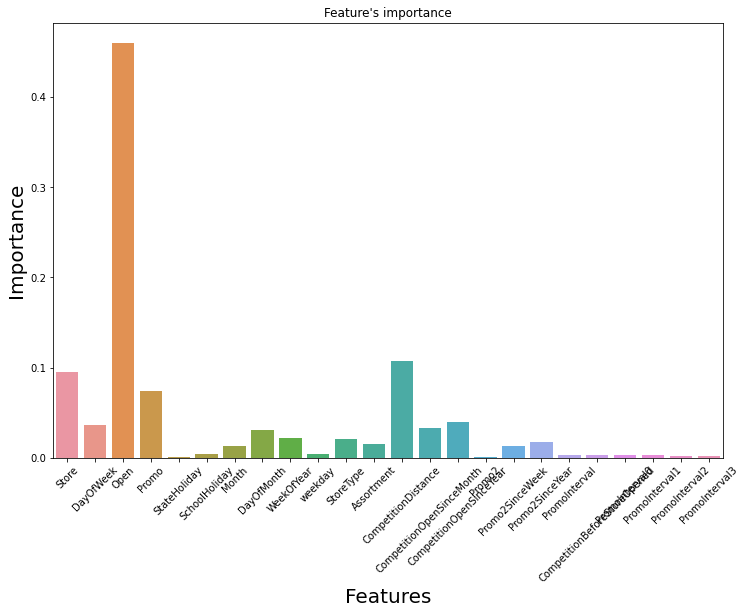

/home/n/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


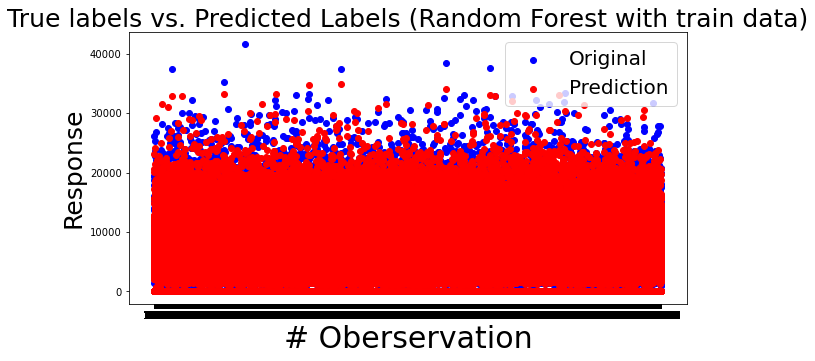

2022-09-08 10:26:38,949:logger:plotted prediction vs true labels
/home/n/anaconda3/lib/python3.9/site-packages/mlflow/tracking/client.py:1267: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  figure.savefig(tmp_path)
/home/n/Documents/10_Academy/Sales-Prediction/scripts/modeling_util.py:182: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  pred_plot.savefig("../images/predictions_plot.png")


In [7]:
run_train_pipeline(model, x, y, 
                experiment_name='Random Forest with train data',
                run_name='RandomForestRegressor(n_estimators=10)')
mlflow.end_run()

#### Adding Tuning using sklearn pipeline

In [7]:
try:
    mlflow.end_run()
except:
    pass

In [8]:
model = RandomForestRegressor(n_estimators=20)
random_grid = { 
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

2022-09-09 17:09:19,795:logger:Piplined retrieved


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5; total time= 2.2min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5; total time= 2.2min
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10; total time= 2.8min
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10; total time= 2.9min
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=1, min_samples_split=10; total time= 2.9min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2; total time= 3.2min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2; total time= 3.3min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2; total time= 3.3min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=5; total time= 2.2min
[CV] END bootstrap=False, max_depth=50, mi

2022-09-09 17:22:50,486:logger:RMSE Score: 1508.4646427042019
2022-09-09 17:22:50,487:logger:R2_Squared: 0.8467325511634001
2022-09-09 17:22:50,488:logger:MAE Score: 857.5689591703168
2022-09-09 17:22:50,496:logger:Accuracy: 83.99 %.
2022-09-09 17:22:51,110:logger:feature importance plotted


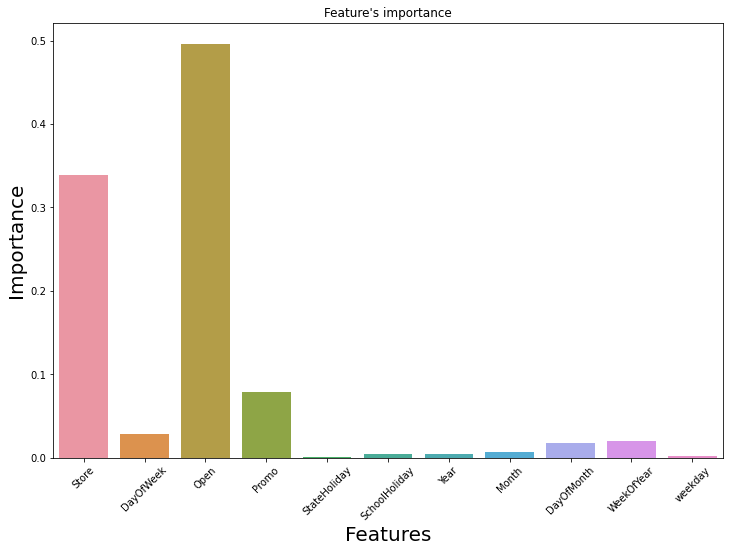

/home/n/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


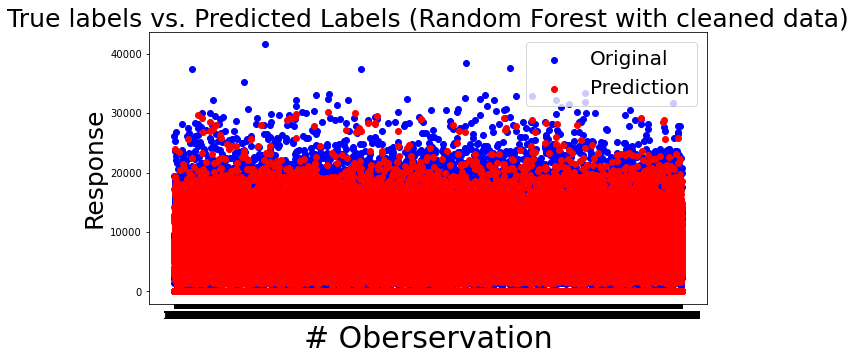

2022-09-09 17:53:32,453:logger:plotted prediction vs true labels
2022/09/09 17:53:33 INFO mlflow.tracking.fluent: Experiment with name 'Random Forest with cleaned data' does not exist. Creating a new experiment.
2022-09-09 17:53:43,762:logger:RESOURCE_DOES_NOT_EXIST: No Experiment with id=2 exists


Run - fine_tuned is logged to Experiment - Random Forest with cleaned data


{'RMSE Score': 1508.46, 'R2_Squared': 0.85, 'MAE Score': 857.57}

In [9]:
run_train_pipeline(rf_random, x, y, 
                experiment_name='Random Forest with cleaned data',
                run_name='fine_tuned')

#### Save Model

In [10]:
from time import gmtime, strftime
import pickle
time = strftime("%Y-%m-%d-%H:%M:%S", gmtime())
with open(f'../models/random_forest{time}.pkl', 'wb') as f:
    pickle.dump(model, f)